C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


For each in :  Decision Trees
Accuracy : 0.9543758967001434

label precision recall
    0       nan  0.000
    1       nan  0.000
    2     0.583  0.163
    3     0.998  1.000
    4     0.706  0.828
    5     0.000  0.000
    6       nan  0.000
    7     1.000  0.333
    8     1.000  0.667
    9     0.935  0.949


For each in :  Random Forests
Accuracy : 0.9553323768531803

label precision recall
    0       nan  0.000
    1       nan  0.000
    2     0.778  0.163
    3     0.998  1.000
    4     0.712  0.825
    5       nan  0.000
    6       nan  0.000
    7     1.000  0.333
    8     1.000  0.667
    9     0.934  0.949


For each in :  Naive Bayes
Accuracy : 0.39808703969392634

label precision recall
    0     0.086  1.000
    1     0.012  1.000
    2       nan  0.000
    3     0.998  0.685
    4     0.095  0.003
    5     0.000  0.000
    6     0.000  0.000
    7     0.005  0.667
    8     0.167  0.667
    9     0.947  0.315


For each in :  SupportVectorClassfier
Accuracy : 0.947

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in longlong_scalars


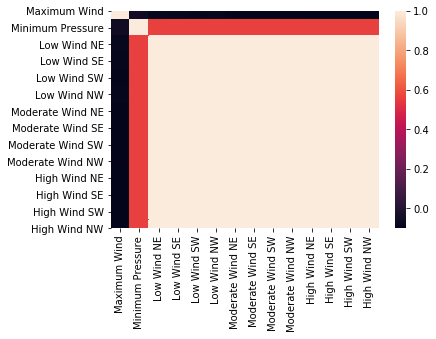

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns

train=pd.read_csv('Pacific_train.csv')
test=pd.read_csv('Pacific_test.csv')

train['Status'].value_counts()
test['Status'].value_counts()

features=['Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']
label='Status'

sns.heatmap(train[features].corr())
#Most of the features looks correlated so let's drop them 
features_selected=['Maximum Wind','Minimum Pressure','Low Wind NE']

X_train=train[features_selected]
y_train=train[label]

#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf_DT = DecisionTreeClassifier()

clf_DT.fit(X_train,y_train)

cross_val_score(clf_DT, X_train, y_train, cv=10).mean()

#Random Forests 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf_RF = RandomForestClassifier(n_estimators=200)

clf_RF.fit(X_train,y_train)

cross_val_score(clf_RF, X_train, y_train, cv=10).mean()

#Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
clf_gnb = GaussianNB()

clf_gnb.fit(X_train,y_train)

cross_val_score(clf_gnb, X_train, y_train, cv=10).mean()

#SVM
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf_svc = SVC(gamma='auto')

clf_svc.fit(X_train,y_train)

cross_val_score(clf_svc, X_train, y_train, cv=10).mean()

X_test=test[features_selected]
y_test=test[label]

pred_DT=clf_DT.predict(X_test)
pred_RF=clf_RF.predict(X_test)
pred_NB=clf_gnb.predict(X_test)
pred_SVC=clf_svc.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix_DT=confusion_matrix(y_test,pred_DT)
confusion_matrix_RF=confusion_matrix(y_test,pred_RF)
confusion_matrix_NB=confusion_matrix(y_test,pred_NB)
confusion_matrix_SVC=confusion_matrix(y_test,pred_SVC)

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
    
all_models=[confusion_matrix_DT,confusion_matrix_RF,confusion_matrix_NB,confusion_matrix_SVC]
algorithms=['Decision Trees','Random Forests','Naive Bayes','SupportVectorClassfier']
for each in range(len(algorithms)):
    print ("For each in : ", algorithms[each])
    print ("Accuracy :",accuracy(all_models[each]) )
    print ()
    print("label precision recall")
    for label in range(10):
        print(f"{label:5d} {precision(label, all_models[each]):9.3f} {recall(label, all_models[each]):6.3f}")
    print ()
    print ()
result=['RandomForestClassifier', 0.96]
result=pd.DataFrame(result)
#writing output to output.csv
result.to_csv('output.csv', header=False, index=False)